In [15]:
include("optim_lib.jl")
include("lib_func.jl")

# Constants and Parameters
d1, d2, ds = 14, 18, 1  # Degree range and step
const n, a, b = 2, 1, 6 
const C = a / b  # Scaling constant, C is appears in `main_computation`, maybe it should be a parameter.
const delta, alph = .9 , 2 / 10  # Sampling parameters
f = tref # Objective function

tref (generic function with 1 method)

In [16]:
coeffs_poly_approx = main_gen(f, n, d1, d2, ds, delta, alph, C, 0.1)

dimension Vector space: 120
sample size: 484
dimension Vector space: 136
sample size: 625
dimension Vector space: 153
sample size: 729
dimension Vector space: 171
sample size: 900
dimension Vector space: 190
sample size: 1024


5-element Vector{Vector{Float64}}:
 [1.5536451632842865, -0.33066882700118927, 0.10620424851144125, 0.23997640185505792, 0.08614706303667295, -0.05115488266265332, 0.03407803588394975, -0.538293703955439, -0.060427899087878725, 0.877136125954535  …  -0.2343935444623892, -6.504633131287462e-18, -3.480924380368508e-9, 3.9348091390141206e-18, -0.003961072438277415, -5.11003781344282e-10, -5.119084283070085e-17, 0.29281044432012493, -4.6530078636812647e-17, -0.010161788740174309]
 [1.5536313700677944, -0.33072415991636706, 0.1062183637109178, 0.24014197480048816, 0.0861823503321337, -0.051404203903245974, 0.033901489865935136, -0.5380506773942649, -0.05987744951443467, 0.8770183410308527  …  -0.003961072438423281, -5.110037561946263e-10, -2.7624104078593487e-17, 7.175432296438065e-11, 0.28943810767052286, -1.504549730641774e-16, 1.5624924127723503e-11, -0.01016178872436898, 1.9638080128235528e-12, -0.13366003783586633]
 [1.5536396176959073, -0.3307205572708274, 0.10620372814209258, 0.24012

In [17]:
using DynamicPolynomials, MultivariatePolynomials, HomotopyContinuation, ProgressLogging, DataFrames

include("hom_solve.jl") # Include the homotopy solver and main function
vars = @polyvar(x[1:n]) # Define polynomial ring 
h_x, h_y, col = main_2d(n, d1, d2, ds, coeffs_poly_approx) # main_2d is in hom_solve.jl
df = DataFrame(x=C * h_x, y=C * h_y, col=col)
df[!, :result] = [f([df.x[i], df.y[i]]) for i in 1:nrow(df)];


Degree: 14
Number of solutions: 74
Degree: 15
Number of solutions: 95
Tracking 225 paths...  92%|██████████████████████████▋  |  ETA: 0:00:00



Tracking 225 paths... 100%|█████████████████████████████| Time: 0:00:00
  # paths tracked:                  225
  # non-singular solutions (real):  225 (99)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         225 (99)
Degree: 16
Number of solutions: 86
Tracking 256 paths...  75%|█████████████████████▊       |  ETA: 0:00:00



Tracking 256 paths... 100%|█████████████████████████████| Time: 0:00:00
  # paths tracked:                  256
  # non-singular solutions (real):  256 (120)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         256 (120)
Degree: 17
Number of solutions: 72
Tracking 289 paths...  53%|███████████████▍             |  ETA: 0:00:00



Tracking 289 paths...  73%|█████████████████████▎       |  ETA: 0:00:00



Tracking 289 paths...  94%|███████████████████████████▍ |  ETA: 0:00:0

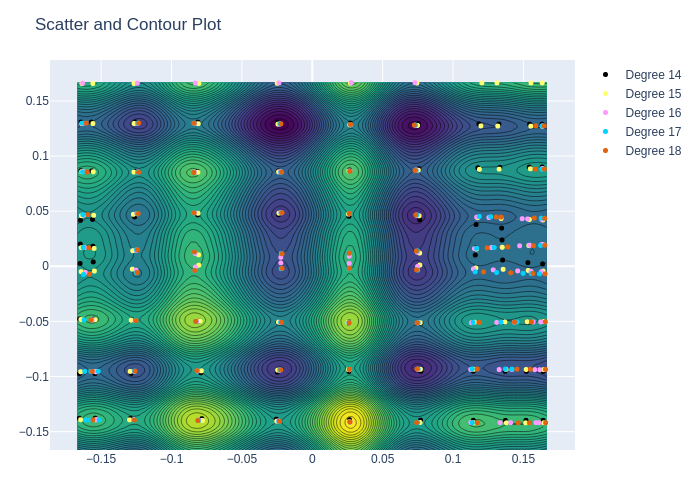

In [19]:
using PlotlyJS, Colors

# Define the function and domain

# Generate the grid and evaluate the function
N = 100  # resolution of the grid
x = range(-C, C, length=N)
y = range(-C, C, length=N)
z = [tref([xi, yi]) for yi in y, xi in x]

# sc_plt = scatter(x=C* h_x, y=C* h_y, mode="markers", marker_color=col, marker_size=5);
# Generate a color palette based on the number of unique `col` values
unique_cols = unique(df.col)
num_colors = length(unique_cols)
color_palette = distinguishable_colors(num_colors)

# Map the `col` values to the corresponding colors
col_to_color = Dict(unique_cols .=> color_palette)

# Create individual scatter traces for each unique `col` value
scatter_traces = [scatter(x=df[df.col .== c, :x], y=df[df.col .== c, :y], mode="markers", marker=attr(color=col_to_color[c], size=5), name="Degree $c") for c in unique_cols]

# Create the contour plot
cp = contour(x=x, y=y, z=z, ncontours=80, colorscale="Viridis", showscale=false)

# Combine contour plot and scatter traces
all_traces = [cp; scatter_traces...]

# Display the combined plot with legend
display(plot(all_traces, Layout(title = "Scatter and Contour Plot")))



Doesn't make too much sense, but maybe we could plot the level sets of the polynomial approximants